In [2]:
from utils.results import *
import torch
import matplotlib.pyplot as plt


In [3]:
# settings for the plots,
dataset= 'mvtec'
run= "contamination_0"  
experiment=  "Exp_11_02_24-"#,"Exp0-r18",
category= "bottle"


RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  

# Refinement Strategies

1.

$\alpha$ = assumed contamination ratio

$\kappa= \alpha*e^{-epoch*b}$

per batch

$L = \kappa * Loss_{ > q_{(1-\alpha)}} + (1-\kappa) * Loss_{ < q_{(1-\alpha)}}$

### Single run Training curves

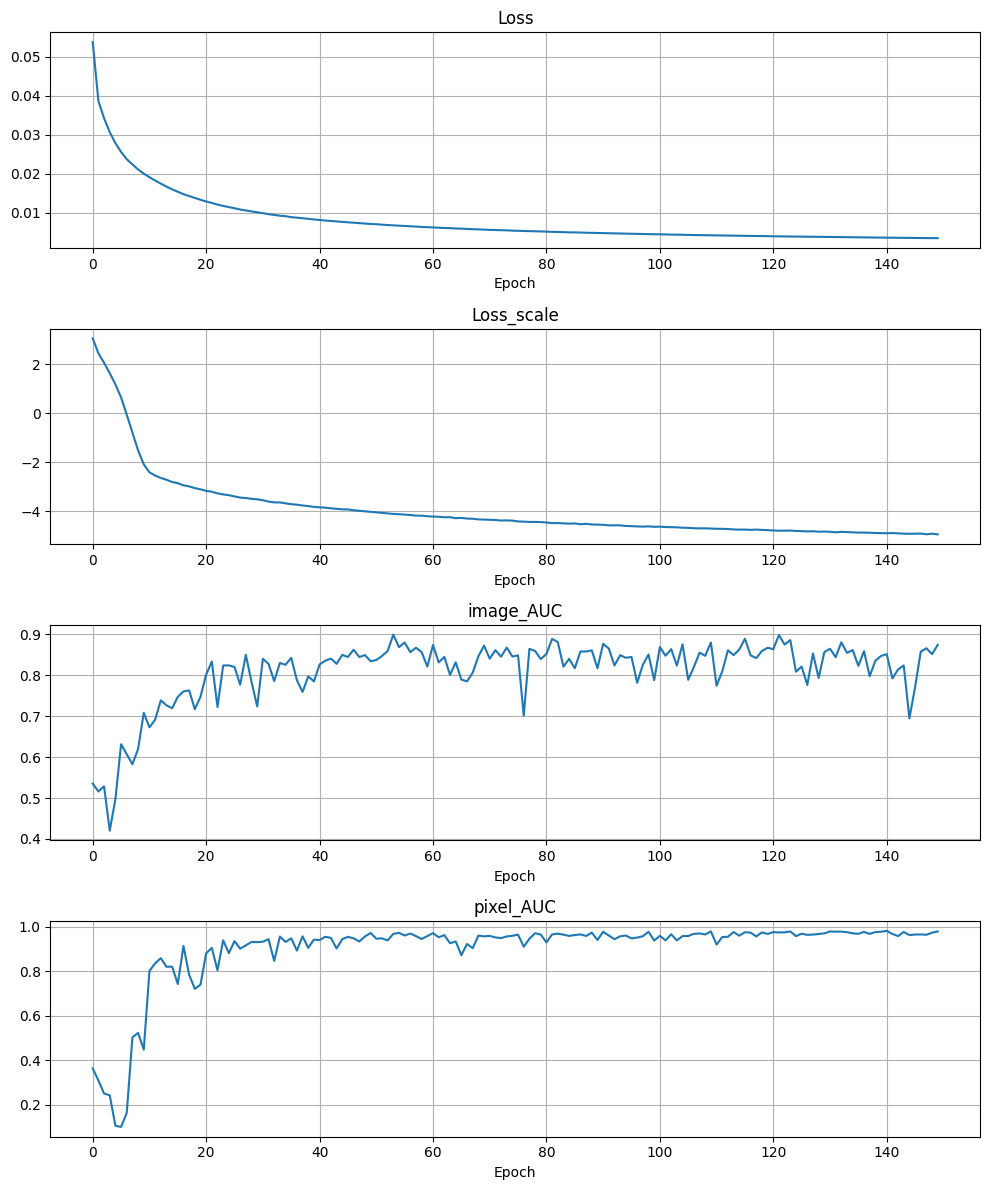

In [8]:
#/home/bule/projects/UTRAD/results/mvtec/contamination_0/DEV_FewData_17_05_24-3-screw/args.log
resdict=read_training_scores('/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_1-screw/args.log')

df=pd.DataFrame(resdict)
df['Loss_scale']=np.log(df['Loss_scale'])

fig, axs = plt.subplots(4, 1, figsize=(10, 12))
for i, column in enumerate(df.columns):
    axs[i].plot(df.index, df[column], linestyle='-')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('')
    axs[i].set_title(f'{column}')
    axs[i].grid(True)
    
    
    
    
plt.tight_layout()
plt.show()

## Multiple runs

#### altered seed

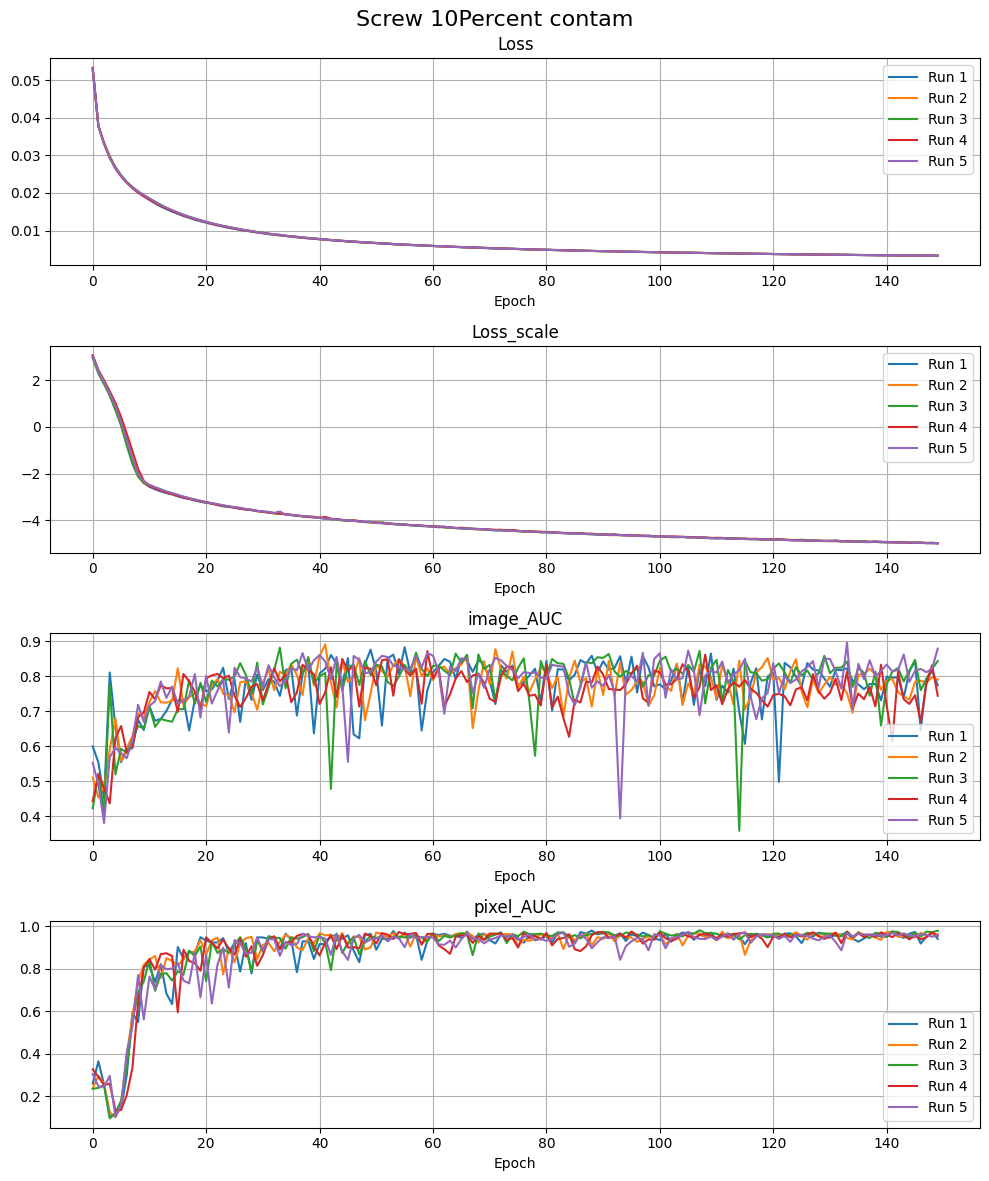

In [6]:
filepaths = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_2-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_3-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_4-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_5-screw/args.log'
]

dataframes = []
for filepath in filepaths:
    resdict = read_training_scores(filepath)
    df = pd.DataFrame(resdict)
    df['Loss_scale'] = np.log(df['Loss_scale'])
    dataframes.append(df)

fig, axs = plt.subplots(4, 1, figsize=(10, 12))
for idx, df in enumerate(dataframes):
    for i, column in enumerate(df.columns):
        axs[i].plot(df.index, df[column], linestyle='-', label=f'Run {idx + 1}')
for i, column in enumerate(dataframes[0].columns):
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('')
    axs[i].set_title(f'{column}')
    axs[i].grid(True)
    axs[i].legend()
    
fig.suptitle('Screw 10 Percent contam', fontsize=16)
plt.tight_layout()
plt.show()

### same seed only model change

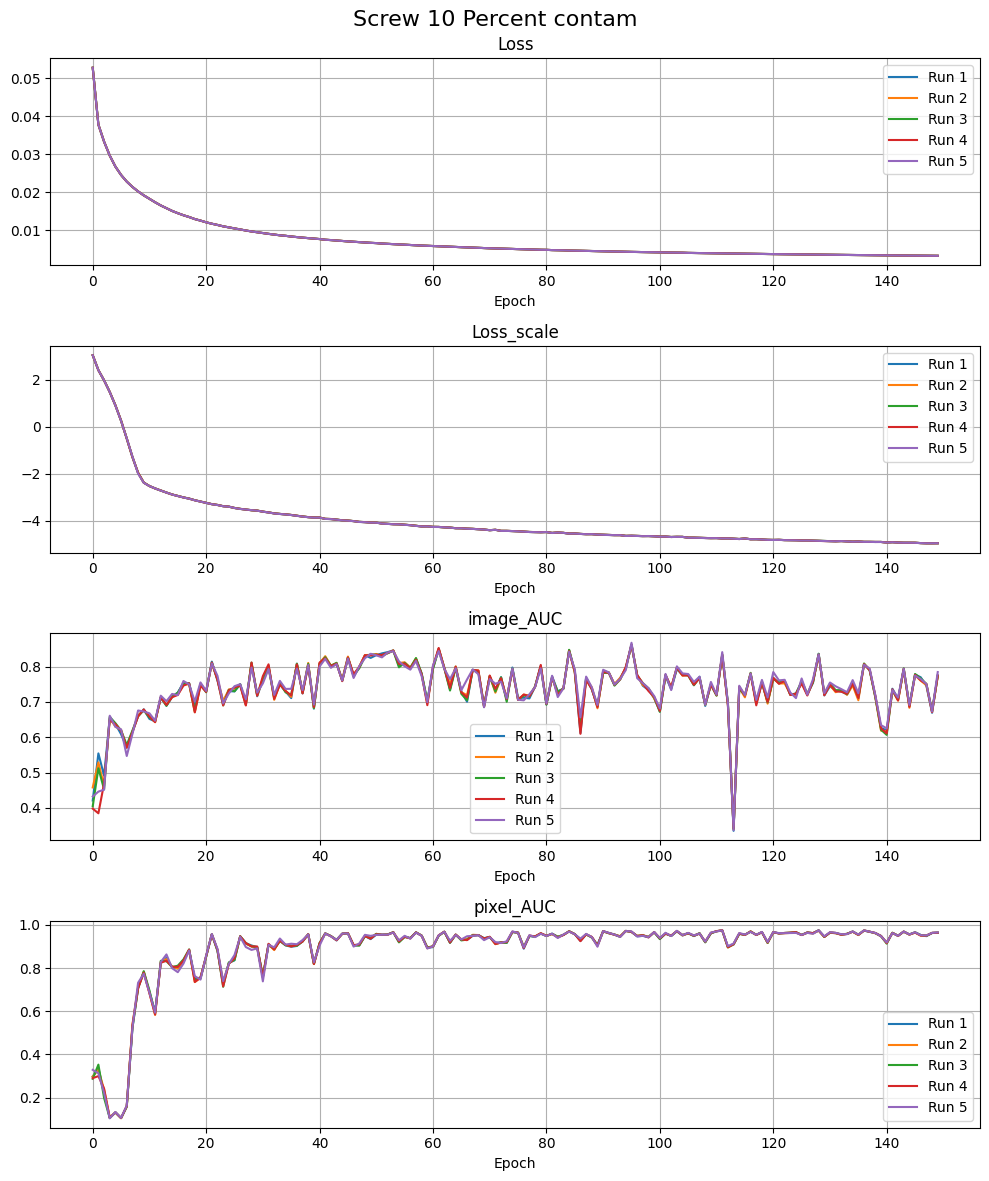

In [8]:
filepaths = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_2-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_3-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_4-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_5-screw/args.log'
]

dataframes = []
for filepath in filepaths:
    resdict = read_training_scores(filepath)
    df = pd.DataFrame(resdict)
    df['Loss_scale'] = np.log(df['Loss_scale'])
    dataframes.append(df)

fig, axs = plt.subplots(4, 1, figsize=(10, 12))
for idx, df in enumerate(dataframes):
    for i, column in enumerate(df.columns):
        axs[i].plot(df.index, df[column], linestyle='-', label=f'Run {idx + 1}')
for i, column in enumerate(dataframes[0].columns):
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('')
    axs[i].set_title(f'{column}')
    axs[i].grid(True)
    axs[i].legend()
    
fig.suptitle('Screw 10 Percent contam', fontsize=16)
plt.tight_layout()
plt.show()

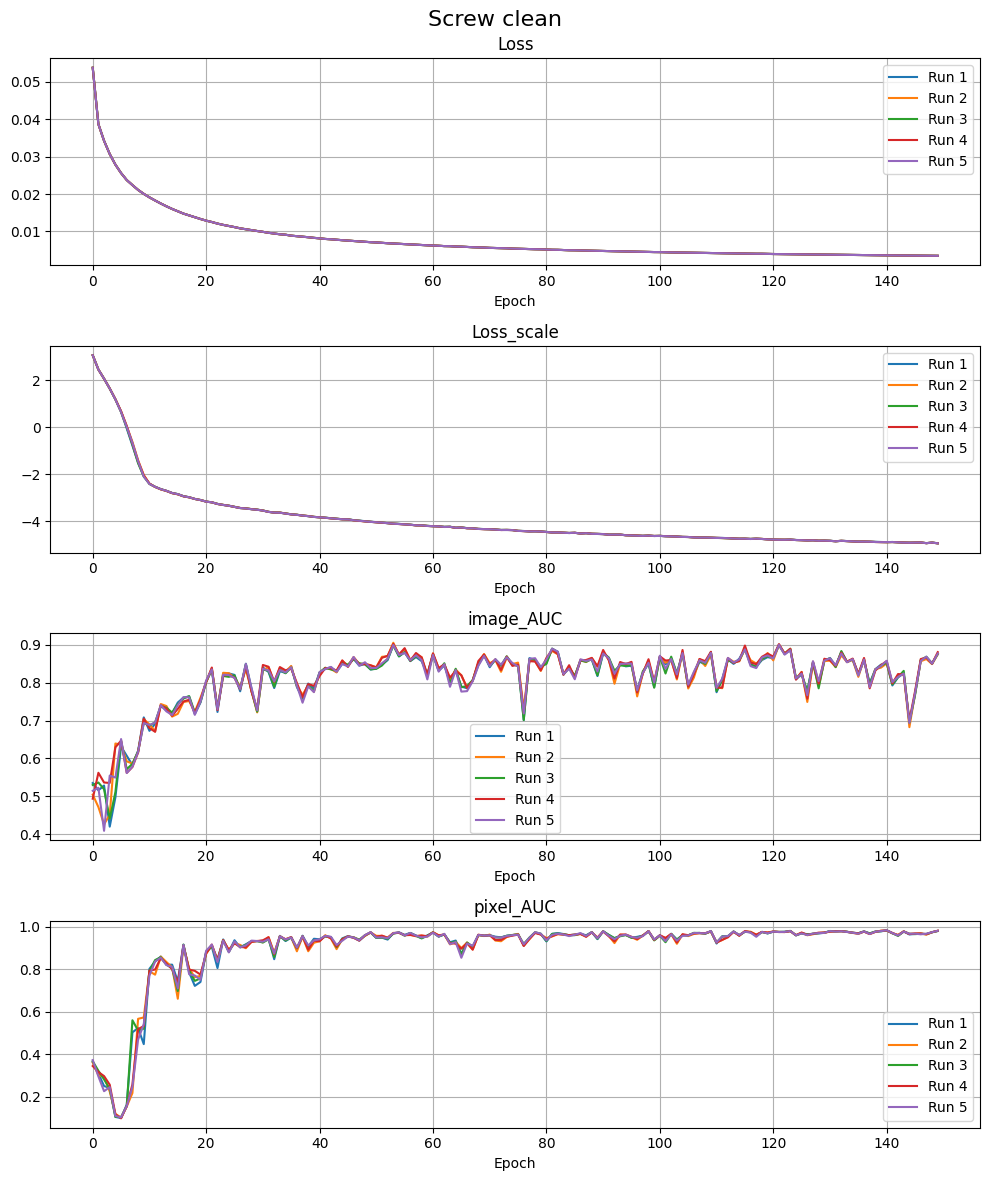

In [7]:
filepaths = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_2-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_3-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_4-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_5-screw/args.log',
]

dataframes = []
for filepath in filepaths:
    resdict = read_training_scores(filepath)
    df = pd.DataFrame(resdict)
    df['Loss_scale'] = np.log(df['Loss_scale'])
    dataframes.append(df)

fig, axs = plt.subplots(4, 1, figsize=(10, 12))
for idx, df in enumerate(dataframes):
    for i, column in enumerate(df.columns):
        axs[i].plot(df.index, df[column], linestyle='-', label=f'Run {idx + 1}')
for i, column in enumerate(dataframes[0].columns):
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('')
    axs[i].set_title(f'{column}')
    axs[i].grid(True)
    axs[i].legend()
    
fig.suptitle('Screw clean', fontsize=16)
plt.tight_layout()
plt.show()

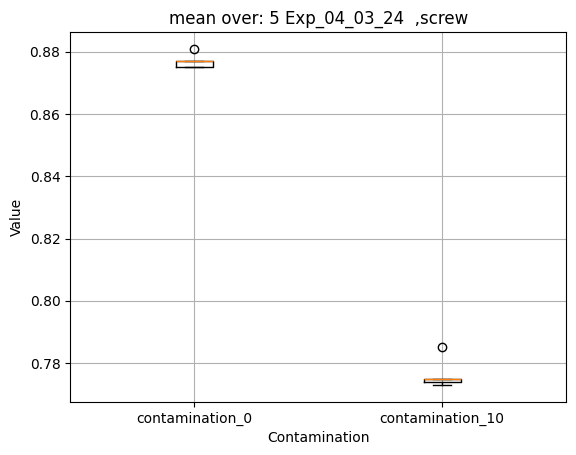

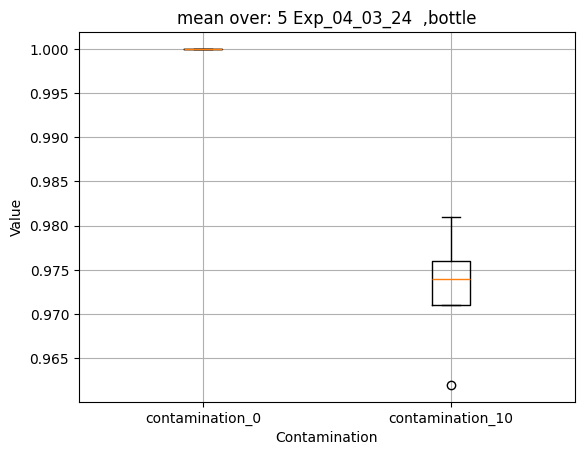

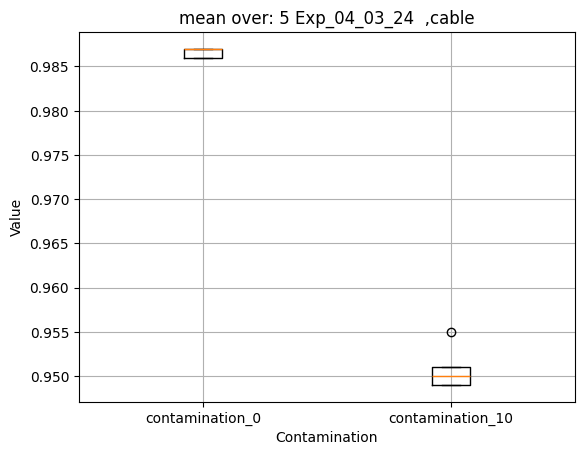

In [3]:
plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="screw" ,reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])
plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="bottle",reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])
plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="cable" ,reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])

## single runs 

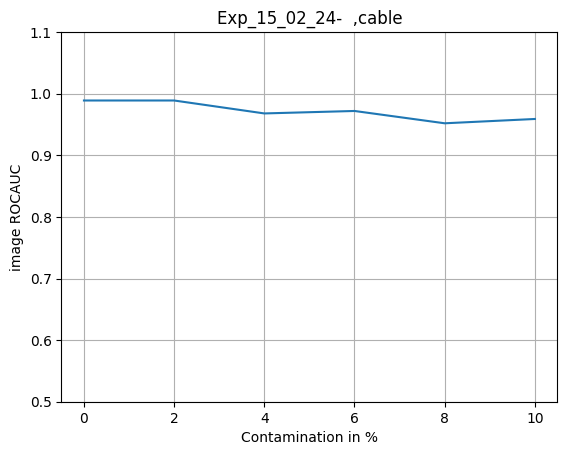

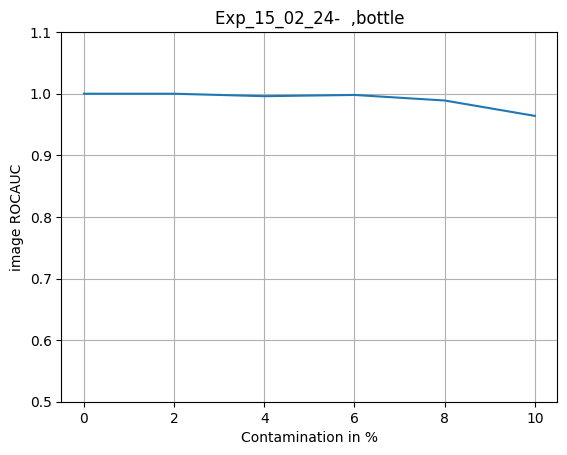

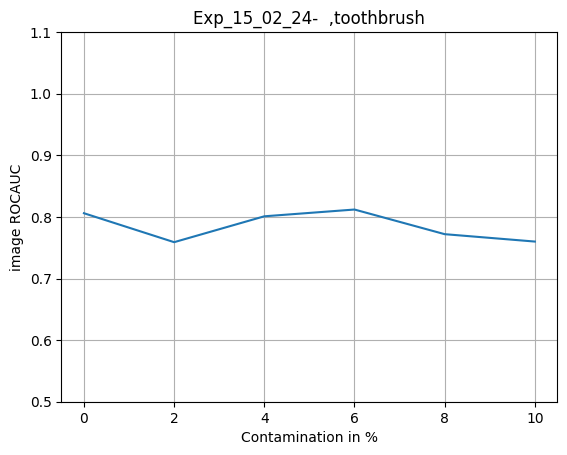

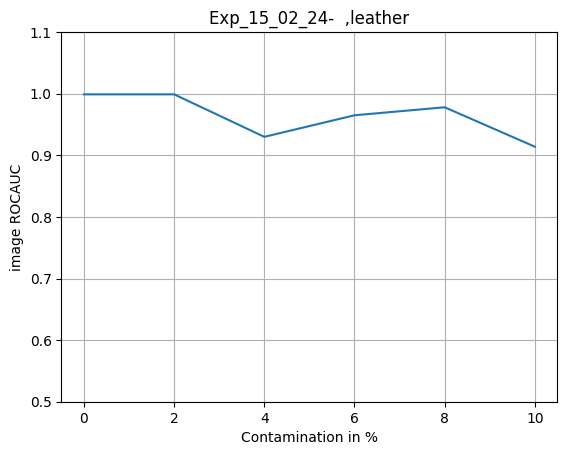

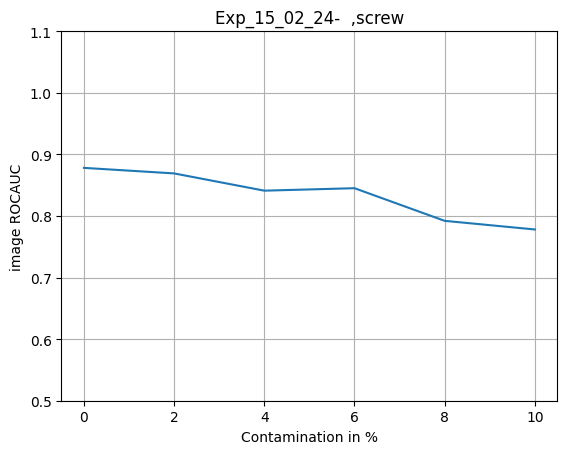

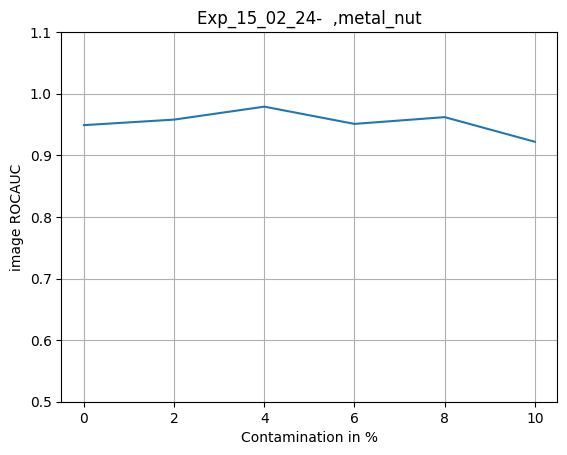

In [3]:
#contam_dir_list=["contamination_0","contamination_2","contamination_4","contamination_6","contamination_8","contamination_10"]
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="cable")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="bottle")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="toothbrush")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="leather")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="screw")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="metal_nut")

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


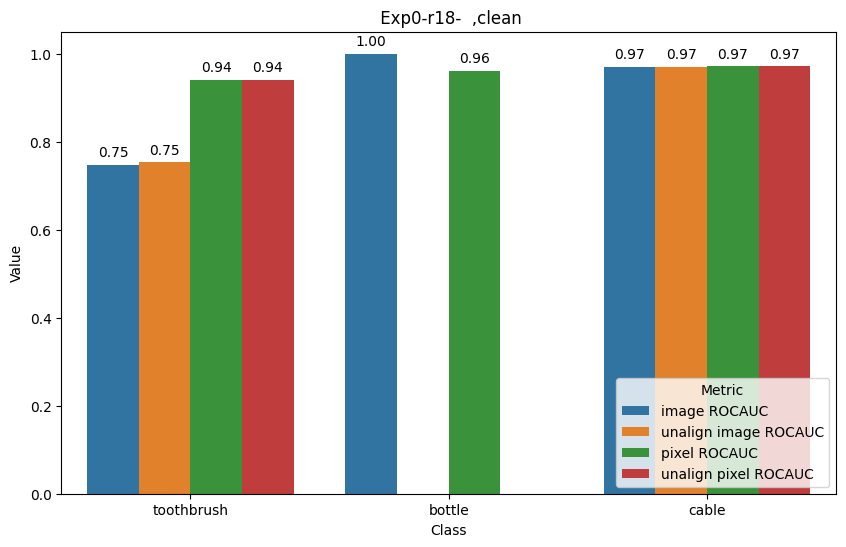

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


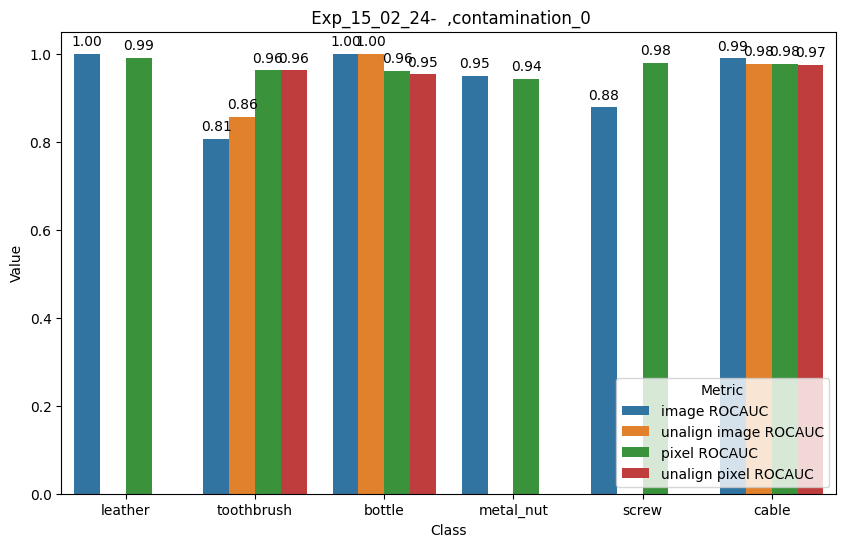

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


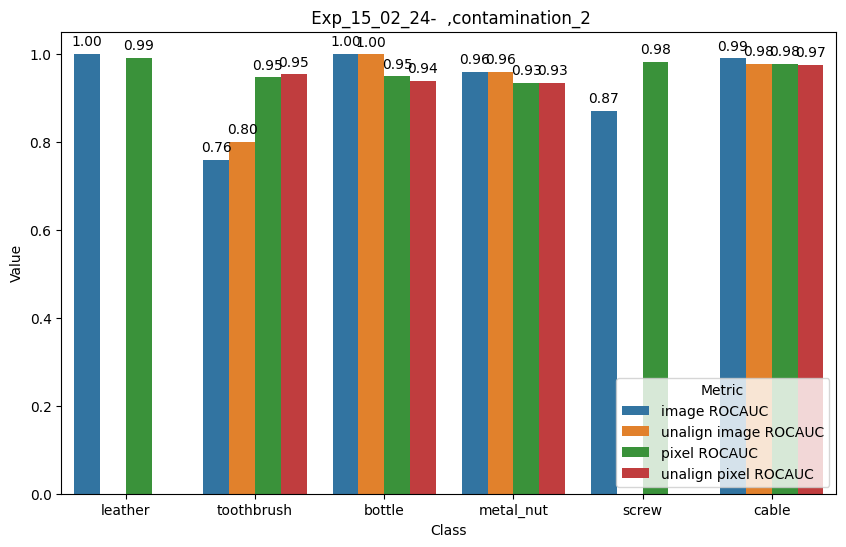

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


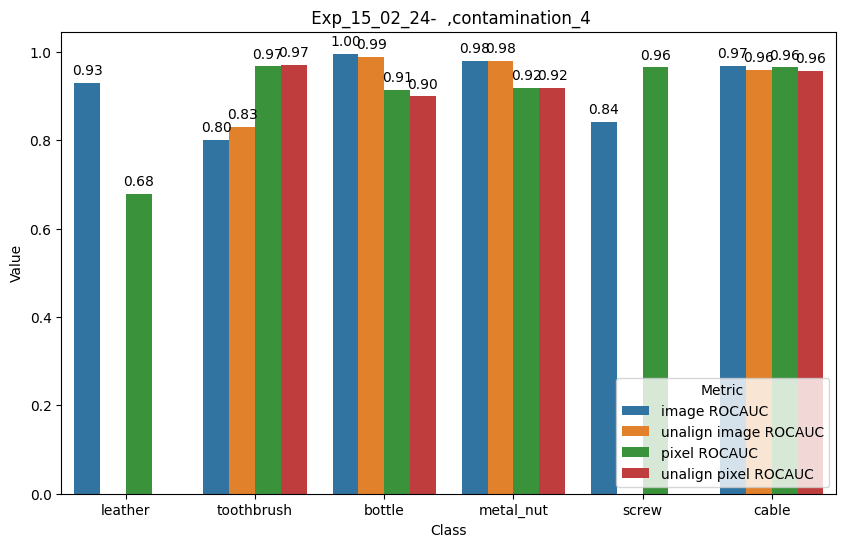

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


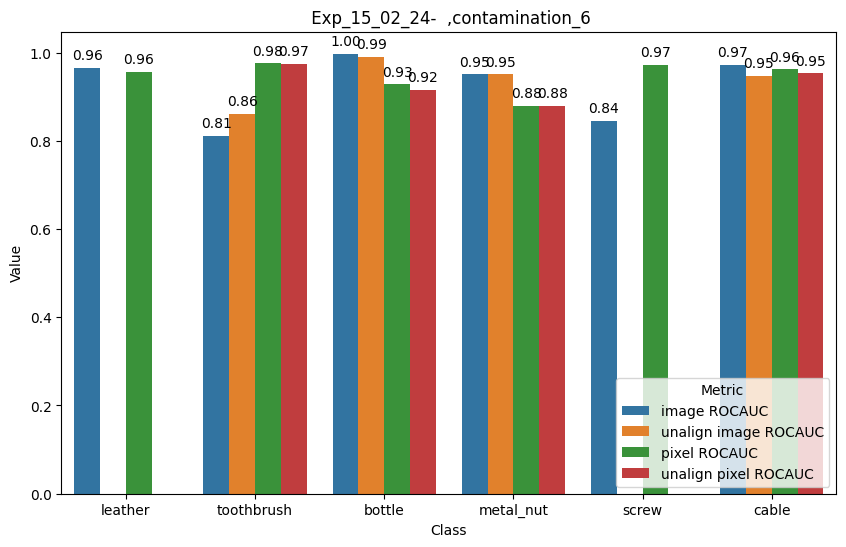

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


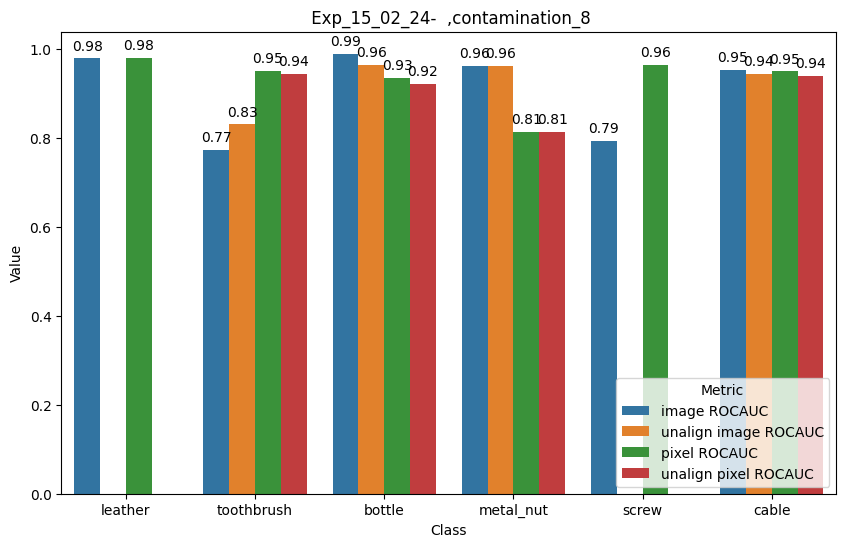

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


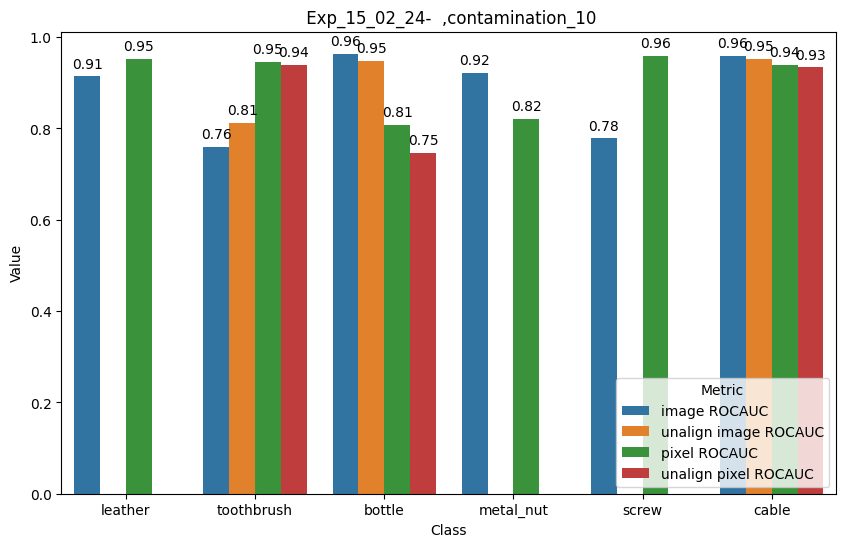

In [4]:
plot_vals_per_category(RESPATH,dataset,run="clean",experiment="Exp0-r18-")
plot_vals_per_category(RESPATH,dataset,run="contamination_0",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_2",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_4",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_6",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_8",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_10",experiment="Exp_15_02_24-")

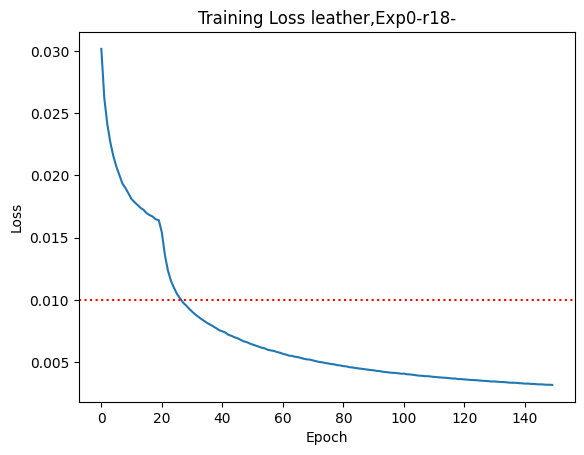

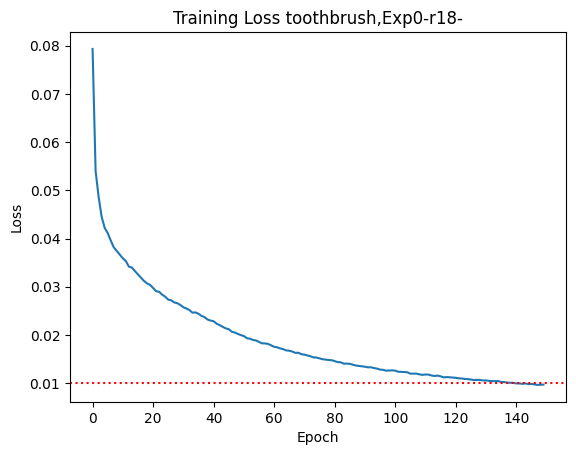

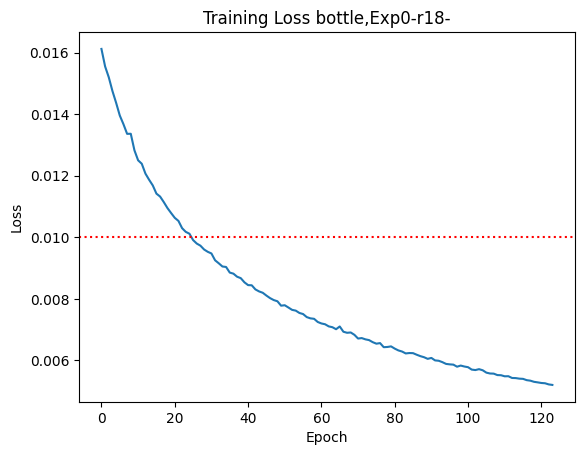

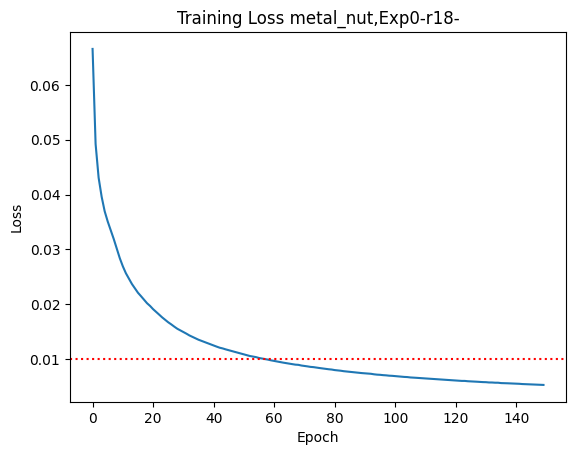

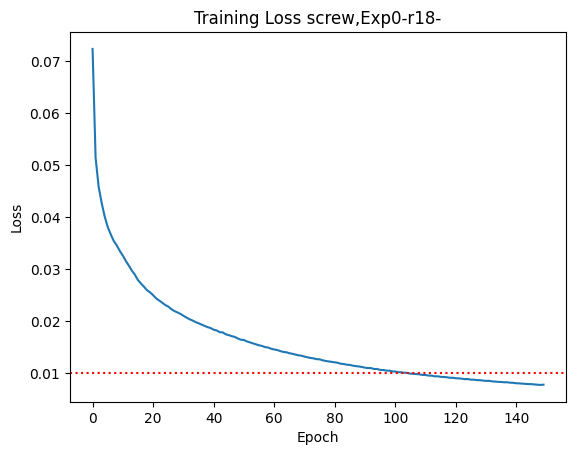

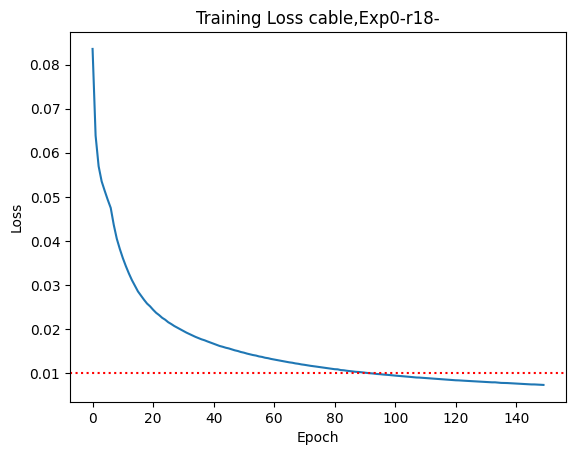

In [5]:
plot_losses(RESPATH,dataset='mvtec',run="clean",experiment="Exp0-r18-")

In [6]:
plot_losses(RESPATH,dataset='mvtec',run="contamination_0",experiment="Exp_11_02_24-")

FileNotFoundError: [Errno 2] No such file or directory: 'results/mvtec/contamination_0/Exp_11_02_24-leather/args.log'

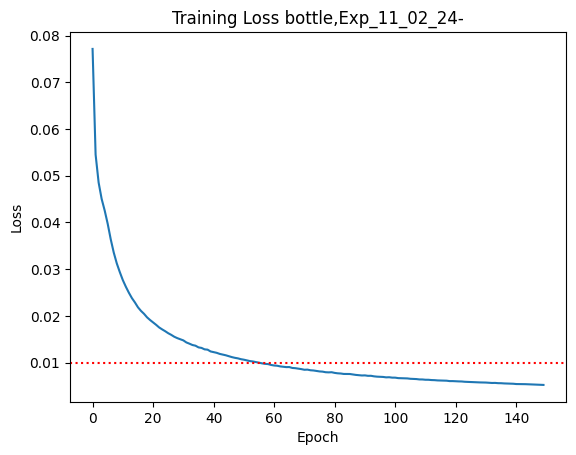

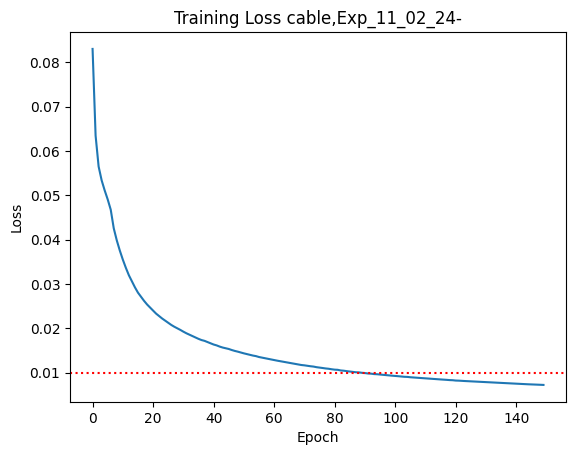

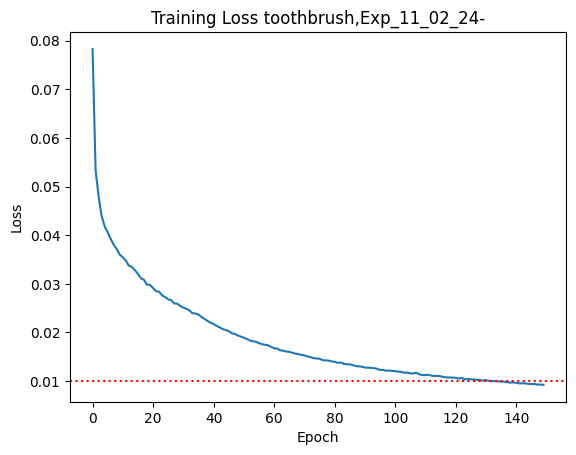

In [ ]:
plot_losses(RESPATH,dataset='mvtec',run="contamination_6",experiment="Exp_11_02_24-")